In [1]:
import numpy as np
import scipy.sparse as sps
import porepy as pp

import ddf.common as co
import ddf.elder as el

from ddf.plot import quiver, plot_cells

from ddf.immagini import *

In [2]:
pbs = {}

# for l in [4]:
for l in [4, 5, 6, 7]:
    nome = f'dk{l}'; print(nome)
    imp = dict(cartella='../simulazioni/elder', nome=nome, esporta=1, parla=2, stato_freq=6)
    pb = co.pkl(imp)
    if pb is None:
        mdg, dati = el.diersch02(l)
        dati['euler_theta'] = 0.5
        pb = el.Elder(mdg, dati, imp)
        pb.init()
        pb.avanza(1/12*co.anno/pb.car['T'], 20*co.anno/pb.car['T'])
    pbs[nome] = pb

dk4
dk5
dk6
dk7


In [30]:
# fig,ax = plt.subplots()
# for j,i in enumerate(pb.vtu_is):
#     plot_cells( pb, pb.importa_i(i)[ pb.dof['concentrazione'] ], ax=ax, **pc_w )
#     fig.savefig(f'../tmp/gif/elder_{j:03d}.png', bbox_inches='tight')
#     ax.cla()
#     plt.close()

In [64]:
# import glob
# import re
# import subprocess
# for s in [ f for f in glob.glob('../dati/*.png') if re.match('.+/[4567][abcd]\.png', f) ]:
#     ns = s[:-6]+'udk'+s[-6:]
#     cmd = f'convert {s} -transparent white -fuzz 20% -colorspace RGB png32:{ns}'
#     print(cmd)
#     subprocess.call(cmd, shell=1)

convert ../dati/7c.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk7c.png
convert ../dati/4d.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk4d.png
convert ../dati/5d.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk5d.png
convert ../dati/7a.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk7a.png
convert ../dati/4c.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk4c.png
convert ../dati/6d.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk6d.png
convert ../dati/6c.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk6c.png
convert ../dati/7d.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk7d.png
convert ../dati/5b.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk5b.png
convert ../dati/6b.png -transparent white -fuzz 20% -colorspace RGB png32:../dati/udk6b.png
convert ../dati/5a.png -transparent white -fuzz 20% -colorspace RGB png32:../dat

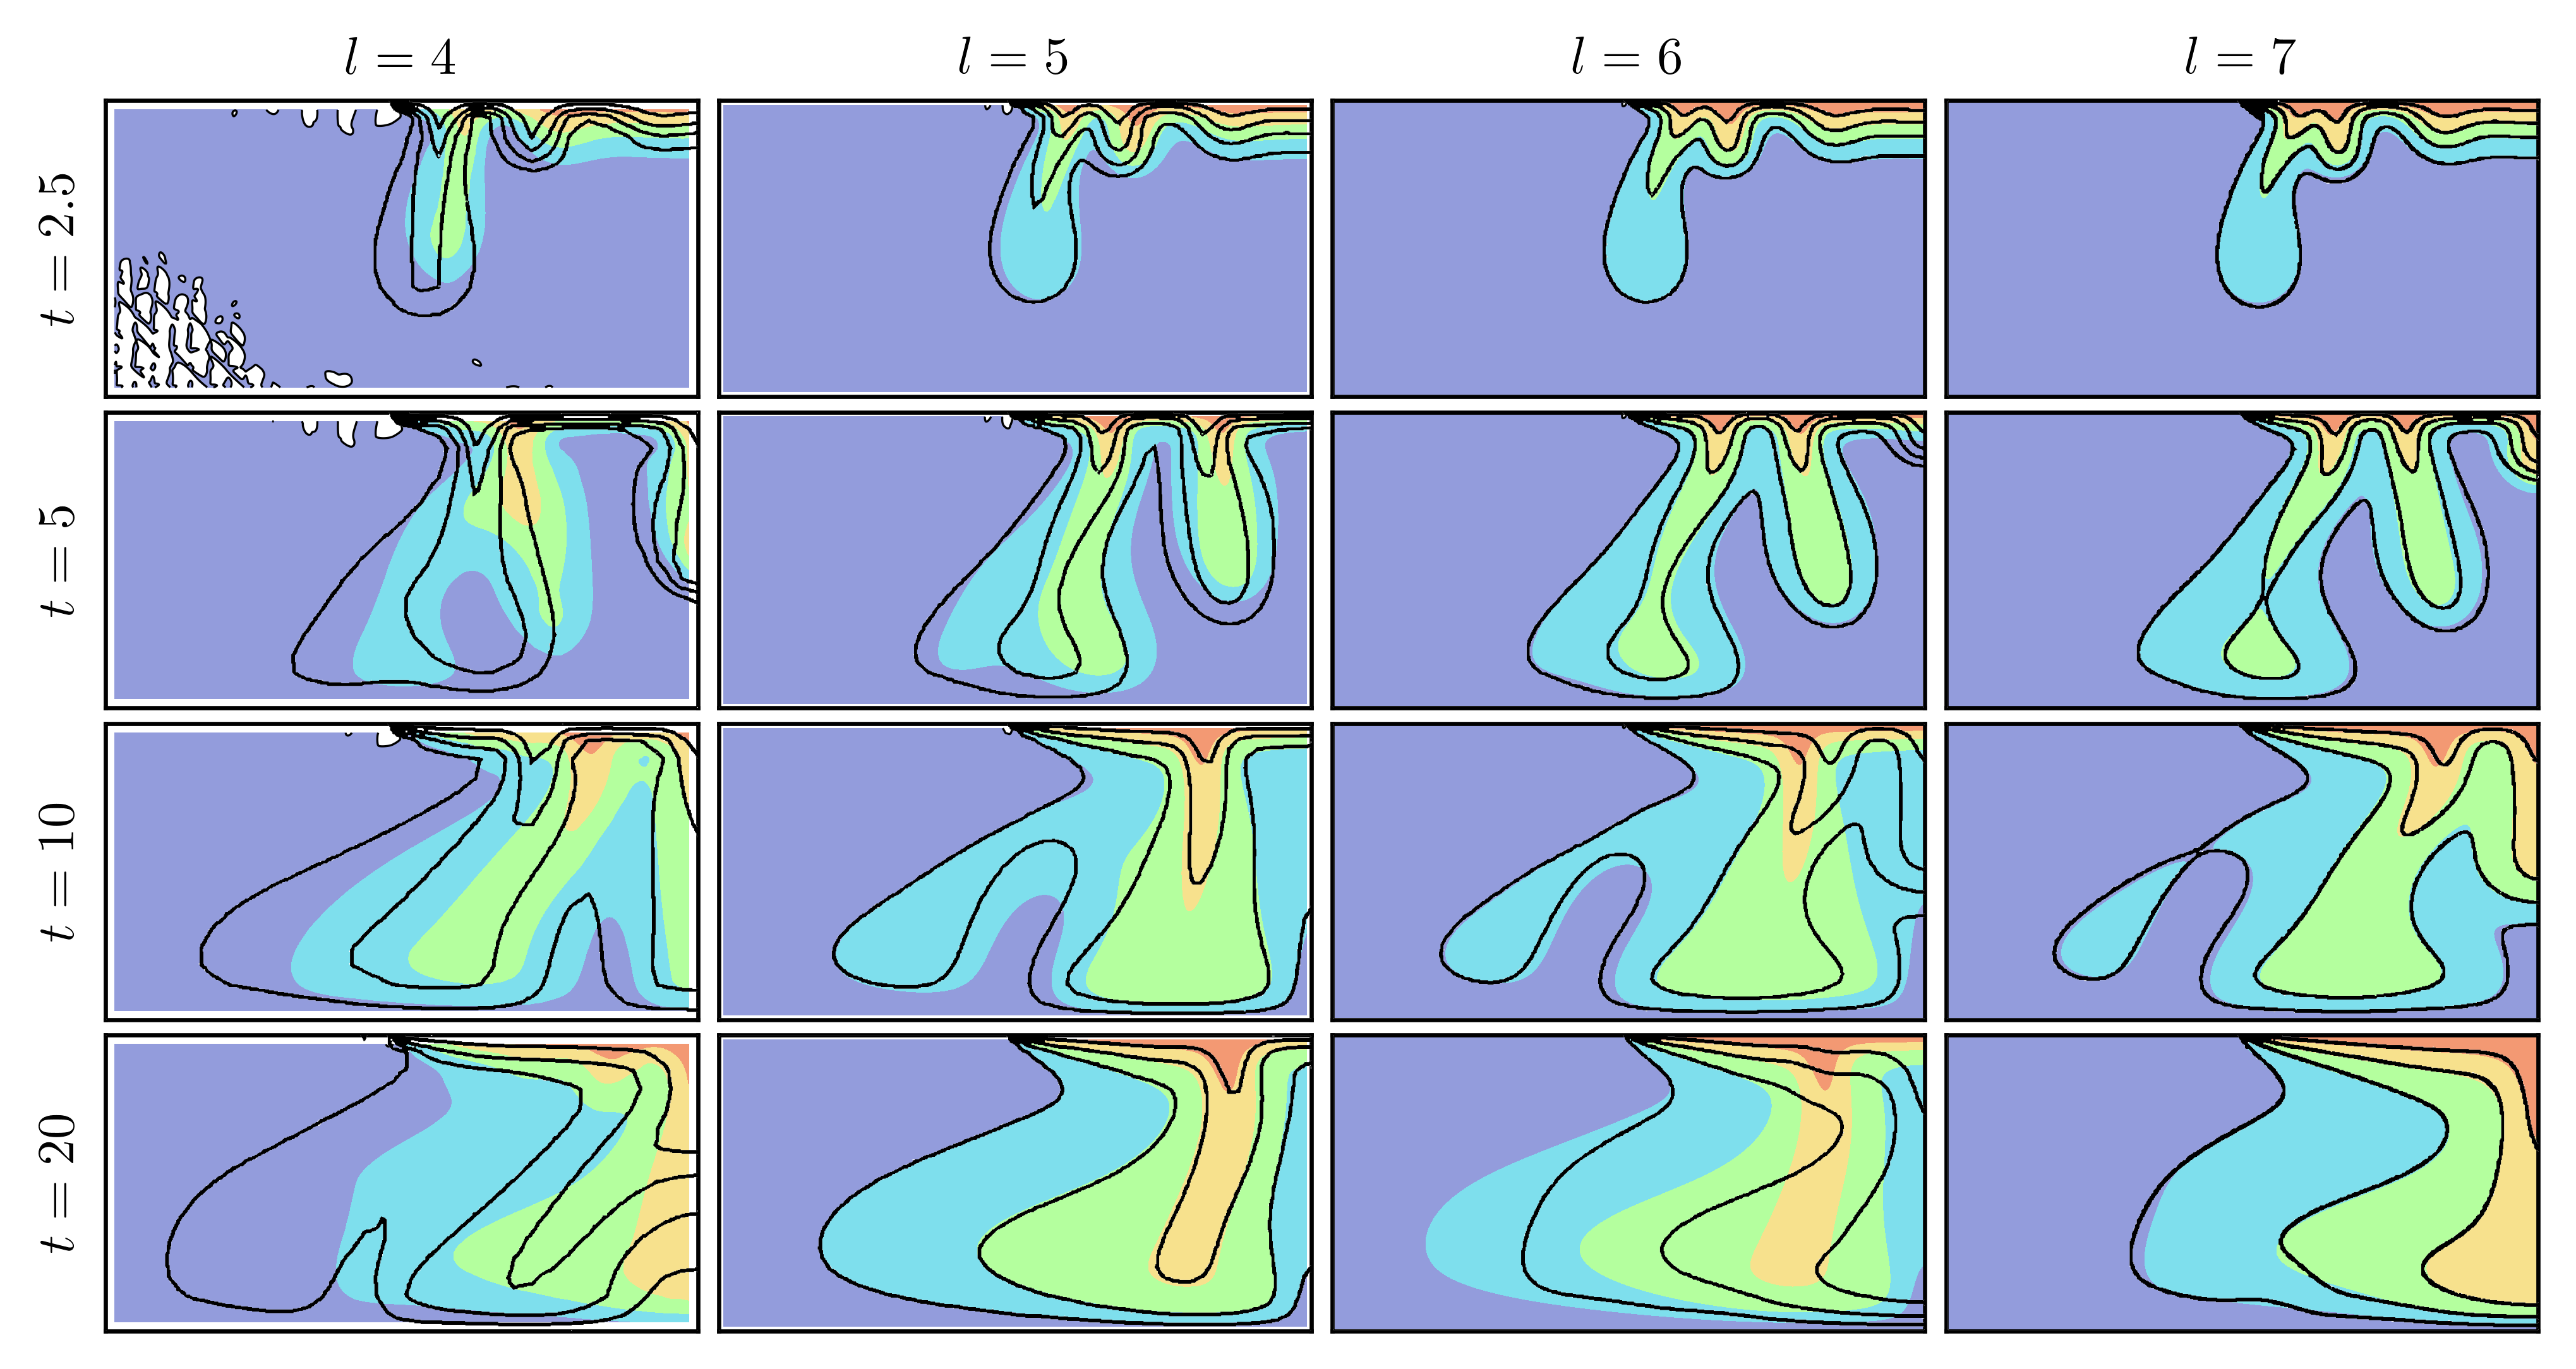

In [4]:
def colonna(axs, pb, l=None, **kwargs):
    assert axs.shape[0] == 4
    
    for i in range(4):
        ax = axs[i]

        stato = pb.importa_t([2.5, 5, 10, 20][i] * co.anno/pb.car['T'] )
        concentrazione = stato[pb.dof['concentrazione']]
        kwargs_ = { 'linestyles': 'dashed', 'linewidths': 0.3, 'colors': 'black' } | kwargs
        levels = np.linspace(0,1,6)
        plot_cells(pb, concentrazione, ax=ax, levels=levels, colors=cmap_w(levels)*0.75 + 0.25*np.r_[1,1,1,1])
        
        plot_cells(pb, concentrazione, ax=ax, fill=0, levels=[0], linewidths=[0.4], colors=['k'])

        if l is not None:
            lettera = ['a', 'b', 'c', 'd'][i]
            immagine = f'../dati/udk{l}{lettera}.png'
            img = np.asarray(Image.open(immagine))
            ax.set_xlim((0, 300)); ax.set_ylim((0, 150))
            ax.imshow(img, extent=[0, 300, 0, 150], zorder=10)

fig,axs = plt.subplots(4, 4, figsize=(linewidth,linewidth/4/2*4*1.05), subplot_kw={'xticks': [], 'yticks': [], 'aspect': 1})
colonna(axs[:,0], pbs['dk4'], 4)
colonna(axs[:,1], pbs['dk5'], 5)
colonna(axs[:,2], pbs['dk6'], 6)
colonna(axs[:,3], pbs['dk7'], 7)

for i in range(4): axs[i,0].set_ylabel(f'$ t = {[2.5, 5, 10, 20][i]} $')
for j in range(4):
    axs[0,j].xaxis.set_label_position('top') 
    axs[0,j].set_xlabel(f'$ l = {4+j} $', labelpad=5)

fig.tight_layout(pad=0.4)
fig.savefig('../immagini/elder_val.png', transparent=1, bbox_inches='tight')